In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [10]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1062    False
1063    False
1064    False
1065    False
1066    False
Length: 1067, dtype: bool

In [12]:
x = df['CO2EMISSIONS']
y = df['VEHICLECLASS']

In [13]:
y.head()

0        COMPACT
1        COMPACT
2        COMPACT
3    SUV - SMALL
4    SUV - SMALL
Name: VEHICLECLASS, dtype: object

In [14]:
x.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [15]:
model = LogisticRegression()

In [8]:
model.fit(x.values, y)

ValueError: Expected 2D array, got 1D array instead:
array=[196. 221. 136. ... 271. 260. 294.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## HOUSE PRICE PREDICTION

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [91]:
df2 = pd.read_csv('housing.csv')
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [92]:
# counting the number of values under a column
df2.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [93]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [96]:
# removes missing values
df2= df2.dropna()
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [97]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [98]:
w = df2.drop(columns = ['median_house_value'] )
u = df2[['median_house_value']]

In [99]:
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [100]:
dfing = df2[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
dfing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

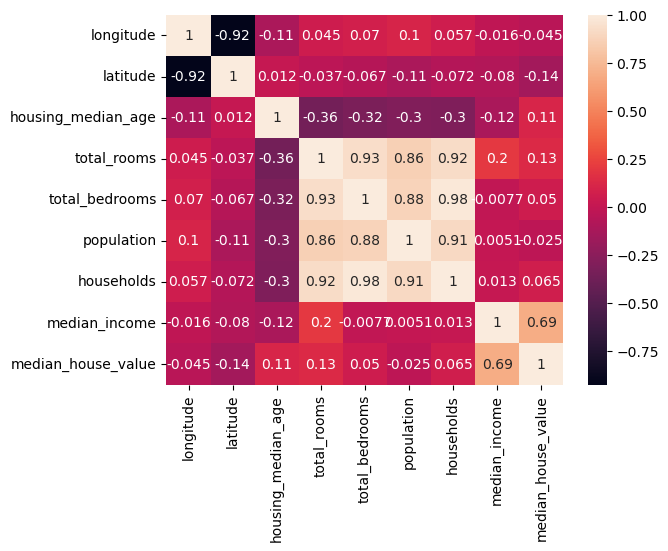

In [101]:
sns.heatmap(dfing.corr(), annot = True)

In [102]:
# transforming a categorical data to numerical data, and the dtype is to make sure they are in intergers
dop = pd.get_dummies(df2[['ocean_proximity']], dtype = int)


In [104]:
# joining two dataframe tables together
new_data = w.join(dop)
new_data = new_data.drop(columns = ['ocean_proximity'], axis= 1)
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [105]:
#counting how mnay times a data appeared under a column
new_data['ocean_proximity_NEAR BAY'].value_counts()

ocean_proximity_NEAR BAY
0    18163
1     2270
Name: count, dtype: int64

In [107]:
# checking the data types of the columns
print(new_data.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object


In [109]:
new_data = new_data.dropna()

In [110]:
# shows correlation with data in a dataframe
new_data.corr().head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.018314,-0.006463,-0.004361,-0.019873,0.000679


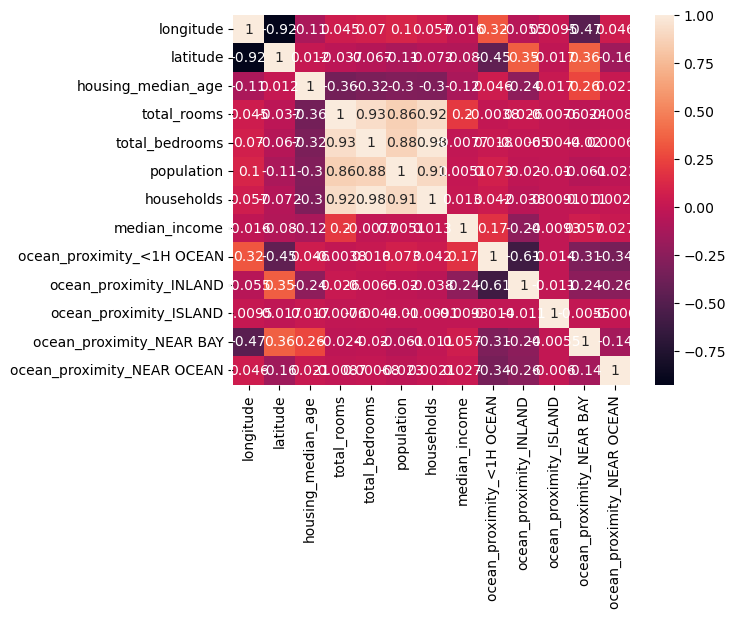

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [111]:
sns.heatmap(new_data.corr(), annot = True)
plt.show()
plt.figure(figsize = (15, 8 ))

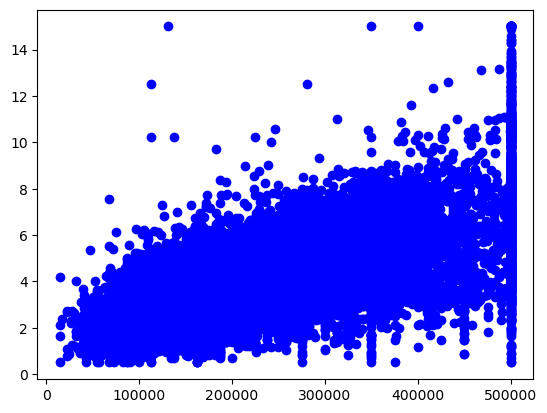

In [112]:
# scatter plot that use two variables
plt.scatter(df2.median_house_value, df2.median_income, color = 'blue')
plt.show()

<Figure size 1500x800 with 0 Axes>

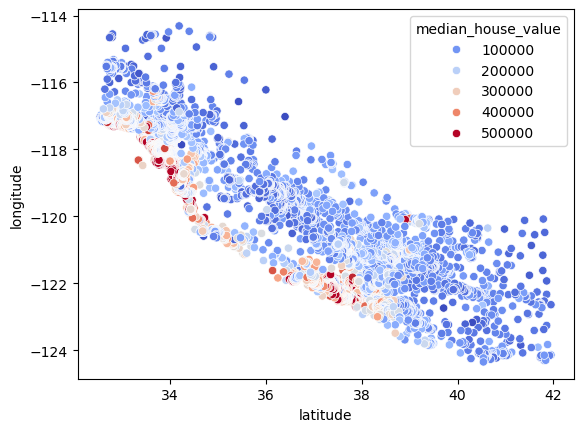

<Figure size 1500x800 with 0 Axes>

In [113]:
# plotting a scatter plot that use three variables 
sns.scatterplot(x='latitude', y='longitude', data = df2, hue = 'median_house_value', palette = 'coolwarm')
plt.figure(figsize = (15, 8))

## TRAINING THE MODEL USING LINEAR REGRESSION

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [161]:
# removes the index from the data set and changes it to a one-dimensional array
u = u.squeeze().reset_index(drop = True).values

In [164]:
new_data.shape

(20433, 13)

In [165]:
# spliting train and test data for the model.
a_train, a_test, b_train, b_test = train_test_split(new_data, u, train_size = 0.8, random_state = 4)
models = LinearRegression()
models.fit(a_train, b_train)

LinearRegression()

In [166]:
models.score(a_test, b_test)

0.6233376876575414

## TRAINING MODEL USING RANDOM FOREST REGRESSOR

In [167]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(a_train, b_train)

RandomForestRegressor()

In [168]:
forest.score(a_test, b_test)

0.8142403472536095